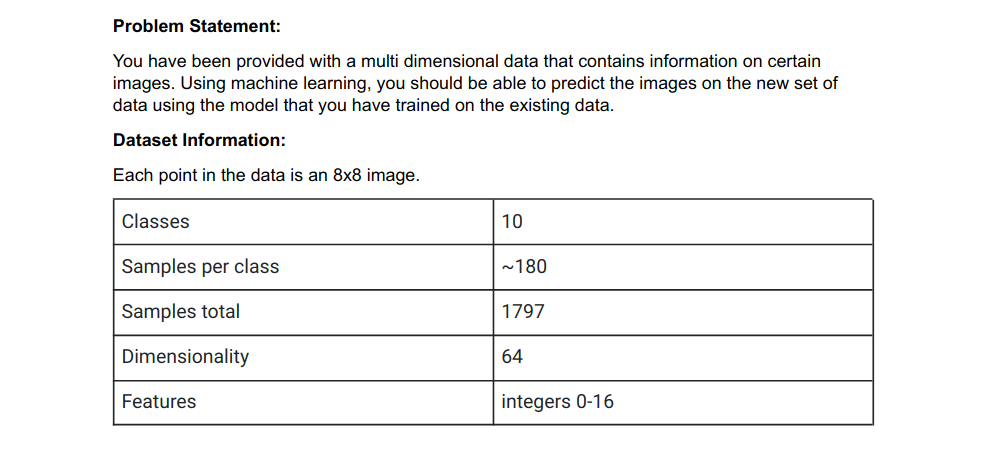

1.PCA is ________?

A. Unsupervised
B. Supervised
C. Semisupervised
D. None of the above

Answer: Option A. Unsupervised

2. Why is PCA needed in the Data Science field?

A. Data Visualization
B. In Dimensionality Reduction
C. Data Manipulation
D. All of the Above

Answer: Option D. All of the Above

In [35]:
# importing required libraries

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn import datasets

import warnings

3. Extract only features and scale the data using StandardScaler() , compute min covariance?

A. -0.5705
B. -1
C. 0.1
D. None of the above

In [6]:
# importing the mnist handwritten digit dataset
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_svmlight_format',
 'base',
 'california_housing',
 'clear_data_home',
 'covtype',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_mldata',
 'fetch_olivetti_faces',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'kddcup99',
 'lfw',
 'load_boston',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_mlcomp',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',
 'make_checkerboard',
 'make_circles',
 'make_classification',
 'make_friedman1',
 'make_friedman2',
 'make_friedman3',
 'make_gaussian_quantiles',
 'make_hastie_10_2',
 'make_low_rank

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()

In [8]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [9]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [12]:
len(digits.target) # all the number available in dataset, as total 1797 digits are available in dataset from 0 to 9

1797

In [13]:
len(digits.target_names) # 0 1 2 3 4 5 6 7 8 9

10

In [18]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [22]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [23]:
for image, label in zip(digits.data[0:5],digits.target[0:5]):
    print(label)
    print(image)

0
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
1
[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
2
[ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
  8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
 15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
  5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
3
[ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
  1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
 12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.  8.  4

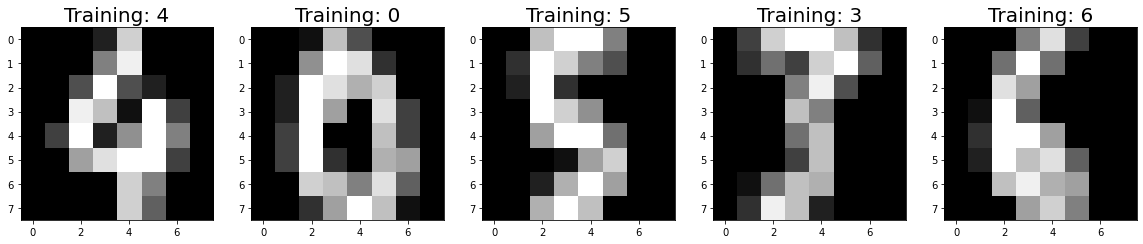

In [28]:
# visualising some to the image & their labels

plt.figure(figsize = (20,4))
for index, (image,label) in enumerate(zip(digits.data[100:105],digits.target[100:105])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    plt.title(f"Training: {label}",fontsize=20)

# Creating a dataframe with all the available pixel values for each of the digits

In [48]:
data = pd.DataFrame(digits.data)
data.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
827,0.0,3.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,7.0,...,5.0,0.0,0.0,4.0,16.0,16.0,16.0,13.0,3.0,0.0
799,0.0,2.0,11.0,14.0,10.0,1.0,0.0,0.0,0.0,6.0,...,7.0,0.0,0.0,1.0,12.0,16.0,16.0,10.0,0.0,0.0
1157,0.0,0.0,4.0,14.0,14.0,2.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,10.0,14.0,4.0,0.0,0.0
1404,0.0,0.0,9.0,16.0,16.0,16.0,4.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,9.0,16.0,16.0,16.0,4.0,0.0
601,0.0,0.0,6.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,...,13.0,7.0,0.0,0.0,5.0,15.0,16.0,16.0,15.0,3.0


In [50]:
data.corr() # Correlation Values

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.000000,0.556618,0.207814,-0.018761,0.060776,0.048388,-0.038927,0.032320,0.556372,...,0.030953,-0.045342,-0.007905,0.855610,0.555727,0.147646,-0.102349,-0.029870,0.026547,-0.043889
2,NaN,0.556618,1.000000,0.560180,-0.084235,0.043569,0.002841,-0.062278,0.022311,0.582259,...,0.050849,-0.003804,-0.025837,0.515276,0.937623,0.499840,-0.134754,-0.041183,0.072599,0.082523
3,NaN,0.207814,0.560180,1.000000,0.023938,-0.171377,-0.115732,-0.040139,0.035663,0.328344,...,0.139397,0.075335,-0.049085,0.175804,0.560326,0.767945,-0.065957,-0.054936,0.053437,0.081971
4,NaN,-0.018761,-0.084235,0.023938,1.000000,0.507731,0.127764,0.010065,0.042065,0.051657,...,-0.264968,-0.212220,0.017352,-0.047223,-0.020176,-0.008867,-0.082125,-0.215809,-0.250699,-0.215349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,NaN,0.147646,0.499840,0.767945,-0.008867,-0.068038,-0.045845,0.001013,0.043374,0.305191,...,0.094718,0.050032,-0.038248,0.112972,0.481711,1.000000,0.058390,-0.094956,0.006849,0.099671
60,NaN,-0.102349,-0.134754,-0.065957,-0.082125,-0.351146,-0.383522,-0.178243,0.048996,-0.000604,...,0.394280,0.105101,0.005697,-0.117908,-0.207957,0.058390,1.000000,0.609515,0.243305,0.103015
61,NaN,-0.029870,-0.041183,-0.054936,-0.215809,-0.268818,-0.304111,-0.141174,0.033409,0.071488,...,0.707519,0.262795,-0.003056,-0.043889,-0.091839,-0.094956,0.609515,1.000000,0.648328,0.261991
62,NaN,0.026547,0.072599,0.053437,-0.250699,-0.267659,-0.178945,-0.063220,0.020689,0.111569,...,0.602267,0.511726,-0.011932,0.014557,0.035369,0.006849,0.243305,0.648328,1.000000,0.620428


In [41]:
len(digits.data[1])

64

In [33]:
x = digits.data
y = digits.target

In [34]:
[x.shape,y.shape]

[(1797, 64), (1797,)]

# Standardizing the data

z = (x - u) / s

    z is scaled data.
    x is to be scaled data.
    u is the mean of the sample datas
    s is the standard deviation of the sample datas

In [36]:
x_std = StandardScaler().fit_transform(x)
x_std

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [40]:
len(x_std[1])

64

In [43]:
Comparing_data = pd.DataFrame({'X_before': digits.data[1],'X_Standard': x_std[1]})
Comparing_data

,X_before,X_Standard
0,0.0,0.000000
1,0.0,-0.335016
2,0.0,-1.094937
3,12.0,0.038648
4,13.0,0.268751
...,...,...
59,11.0,-0.249010
60,16.0,0.849632
61,10.0,0.548561
62,0.0,-0.505670


In [51]:
mean_vec = np.mean(x_std, axis=0) # mean of standardized data
var_vec=np.var(x_std,axis=0) # variance of standardized data

In [52]:
# taking tronspose of x_std

x_trans = x_std.T

In [53]:
x_trans.shape # data was of shape: (1797, 64)

(64, 1797)

#### 3. Extract only features and scale the data using StandardScaler() , compute min covariance?

A. -0.5705
B. -1
C. 0.1
D. None of the above

In [54]:
# covariance matrix
cov_mat = np.cov(x_std.T)

In [59]:
minimum_covariance = cov_mat.min()
minimum_covariance

-0.5705136332381098

#### Answer: Option A. -0.5705

#### 4. Extract only features and scale the data using StandardScaler() , how many eigen_values willbe calculated?

A. 1
B. 64
C. 1797
D. 0

In [62]:
eigen_values,eigen_vectors = np.linalg.eig(cov_mat)
eigen_values

array([7.34477606, 5.83549054, 5.15396118, 3.96623597, 2.9663452 ,
       2.57204442, 2.40600941, 2.06867355, 1.82993314, 1.78951739,
       1.69784616, 1.57287889, 1.38870781, 1.35933609, 1.32152536,
       1.16829176, 1.08368678, 0.99977862, 0.97438293, 0.90891242,
       0.82271926, 0.77631014, 0.71155675, 0.64552365, 0.59527399,
       0.5765018 , 0.52673155, 0.5106363 , 0.48686381, 0.45560107,
       0.44285155, 0.42230086, 0.3991063 , 0.39110111, 0.36094517,
       0.34860306, 0.3195963 , 0.29406627, 0.05037444, 0.27692285,
       0.06328961, 0.258273  , 0.24783029, 0.2423566 , 0.07635394,
       0.08246812, 0.09018543, 0.09840876, 0.10250434, 0.11188655,
       0.11932898, 0.12426371, 0.13321081, 0.14311427, 0.217582  ,
       0.15818474, 0.16875236, 0.20799593, 0.17612894, 0.2000909 ,
       0.18983516, 0.        , 0.        , 0.        ])

In [63]:
len(eigen_values)

64

#### Answer: Option B. 64

#### 5. from the above eigenvalues and eigenvectors, create eigenpair and calculate maximum cumulative explained variance?

A. 100
B. 90
C. 80
D. 69

In [69]:
eig_pairs=[(np.abs(eigen_values[i]),eigen_vectors[:,i]) for i in range (len(eigen_values))]
eig_pairs.sort(key = lambda x:x[0],reverse=True)
tot =sum(eigen_values)
var_exp = [(i/tot)*100 for i in sorted (eigen_values, reverse=True)] # individuals explained variance
cum_exp_var = np.cumsum(var_exp) # cumulative explained variance
print("Maximum Cumulative explained variance: ", int(cum_exp_var.max()))

Maximum Cumulative explained variance:  100


#### Answer: Option A. 100

#### 6.Why is cumulative explained variance required before applying PCA?

A. To check the maximum components to be selected
B. To check the distribution of the data
C. To check the minimum components to be selected
D. All of the above

#### Answer: Option C. To check the minimum components to be selected

#### 7. from the below plot, select the range of components can be selected?

A. 0-10
B. 10-20
C. 40-60
D. 30-40

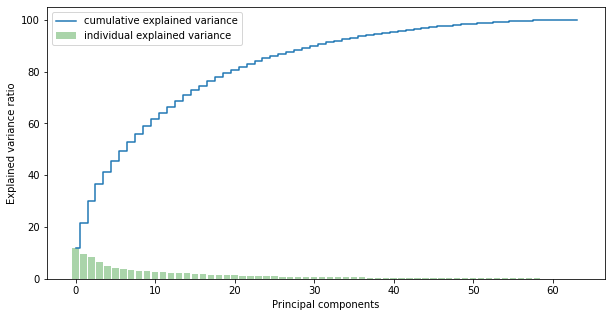

In [71]:
# plotting a graph to select the range of components

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_exp_var)), cum_exp_var, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

#### Answer: Option B. 10-20

# Performing PCA on the Data

In [72]:
x_train, x_test, y_train, y_test= train_test_split(x_std,y)
pca = PCA(n_components=20)
pca_x_train = pca.fit_transform(x_train)
pca_x_test = pca.transform(x_test)

In [73]:
pca_x_train.shape

(1347, 20)

In [74]:
pca.explained_variance_

array([7.44475276, 5.95615836, 5.14689065, 4.02373225, 3.02450743,
       2.75376564, 2.4009654 , 2.01036179, 1.84070566, 1.78418884,
       1.63526363, 1.50579661, 1.3581062 , 1.32548526, 1.1441187 ,
       1.11926922, 0.98389666, 0.910173  , 0.76698517, 0.75442566])

#### 8. Fit the data to PCA and compute the maximum explained_variance_ratio?

A. 0.120
B. 0.9
C. 0.012
D. 0.011

In [77]:
pca.explained_variance_ratio_

array([0.12548896, 0.10039717, 0.08675613, 0.06782414, 0.05098118,
       0.04641755, 0.04047074, 0.03388671, 0.03102698, 0.03007434,
       0.02756405, 0.02538175, 0.02289227, 0.02234242, 0.0192853 ,
       0.01886643, 0.01658459, 0.0153419 , 0.01292832, 0.01271662])

In [78]:
pca.explained_variance_ratio_.max()

0.12548895516878325

#### Answer: Option A. 0.120

#### 9. fit the KMeans model on top of PCA fitted data and find the optimal number of clusters(k-value)?

A. 5-6
B. 6
C. 7-8
D. 4

In [79]:
from sklearn.cluster import KMeans
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8] # number of clusters
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters)
    kmeans.fit(pca_x_train)
    ssd.append(kmeans.inertia_)
ssd

/home/prashant/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


[57489.11405513162,
 52627.533184643,
 48904.20470014715,
 46149.00408023264,
 43201.77667685854,
 41081.77622343111,
 38142.18493770548]

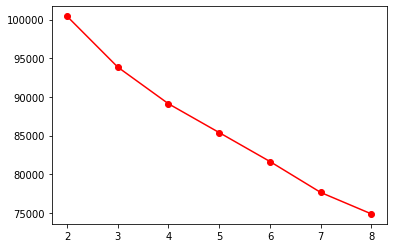

In [85]:
plt.plot(range_n_clusters,ssd,marker='o',color='r')

#### Answer: Option D. 4

#### 10. Calculate the optimal number of clusters for the data without applying PCA?

A. 5
B. 6
C. 7
D. 8

In [93]:
from sklearn.cluster import KMeans
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8,9,10,11,12,13,14,15] # number of clusters
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters)
    kmeans.fit(x_std)
    ssd.append(kmeans.inertia_)
ssd

[100429.19697377717,
 93857.79698372637,
 89113.75131456809,
 85395.89926195709,
 81693.45604278482,
 78506.35456121137,
 74701.55552061195,
 72217.49074572754,
 69683.62324880052,
 67259.33924195437,
 65078.84654579778,
 64797.51585486021,
 61713.16979989075,
 60344.20022055157]

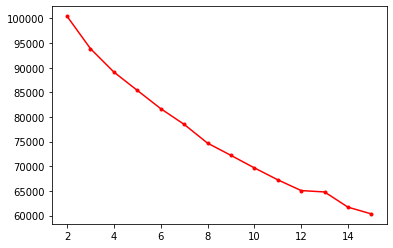

In [95]:
plt.plot(range_n_clusters,ssd, marker='.',color='r')

#### Answer: Option D. 8

# With the above PCA data your decision tree model with train test ratio as 80:20, and random_state=40 .

#### 11. With the help of the above model how many images have been misclassified by the model.

A. 40-50
B. 60-70
C. 50-60
D. 70-80

In [102]:
rf= DecisionTreeClassifier().fit(pca_x_train,y_train)

In [103]:
predicted = rf.predict(pca_x_test)
predicted

array([8, 4, 2, 5, 7, 1, 2, 6, 5, 8, 4, 1, 0, 2, 8, 9, 3, 9, 6, 3, 6, 0,
       0, 5, 0, 0, 1, 6, 4, 7, 4, 6, 5, 6, 4, 5, 0, 4, 6, 9, 5, 4, 9, 3,
       7, 7, 0, 4, 0, 1, 3, 8, 5, 4, 3, 5, 7, 8, 7, 4, 5, 7, 1, 2, 9, 6,
       2, 9, 1, 1, 1, 5, 1, 9, 6, 1, 3, 7, 1, 3, 3, 8, 7, 0, 3, 6, 5, 8,
       7, 1, 6, 4, 5, 8, 9, 3, 0, 6, 9, 1, 3, 2, 7, 3, 2, 1, 5, 7, 7, 5,
       9, 4, 4, 3, 3, 7, 8, 5, 9, 1, 2, 8, 9, 0, 2, 9, 8, 4, 1, 6, 3, 4,
       9, 4, 6, 9, 0, 5, 5, 6, 1, 1, 3, 1, 6, 5, 7, 2, 2, 9, 4, 9, 9, 7,
       6, 2, 7, 6, 0, 6, 0, 6, 9, 0, 0, 6, 0, 9, 5, 4, 6, 4, 2, 4, 3, 0,
       8, 2, 3, 7, 0, 6, 2, 5, 2, 2, 4, 9, 9, 9, 3, 7, 2, 0, 2, 6, 1, 9,
       5, 0, 7, 6, 5, 7, 5, 9, 2, 3, 2, 9, 6, 3, 2, 3, 1, 2, 7, 9, 3, 4,
       1, 9, 3, 5, 2, 1, 7, 6, 3, 3, 2, 0, 3, 0, 2, 6, 3, 0, 0, 8, 7, 6,
       4, 8, 4, 8, 6, 6, 8, 7, 6, 9, 2, 1, 2, 5, 4, 9, 3, 1, 6, 5, 6, 1,
       0, 1, 4, 0, 1, 8, 8, 1, 6, 7, 3, 3, 2, 7, 2, 5, 0, 5, 2, 7, 4, 0,
       0, 4, 6, 9, 2, 0, 6, 4, 5, 0, 4, 0, 1, 4, 4,

In [105]:
accuracy_score(predicted,y_test)

0.8422222222222222

In [106]:
expected=y_test
expected

array([2, 4, 2, 5, 7, 1, 2, 6, 0, 5, 4, 1, 0, 8, 8, 9, 7, 9, 1, 3, 6, 0,
       6, 5, 0, 9, 8, 6, 4, 7, 4, 8, 5, 1, 9, 3, 0, 4, 6, 9, 5, 4, 8, 3,
       7, 7, 0, 4, 9, 1, 3, 6, 5, 4, 3, 5, 1, 8, 7, 4, 5, 7, 1, 2, 9, 6,
       2, 9, 8, 1, 1, 3, 1, 9, 4, 1, 3, 7, 1, 3, 3, 8, 7, 0, 3, 6, 5, 2,
       7, 1, 6, 4, 5, 8, 9, 3, 0, 3, 9, 1, 3, 2, 7, 3, 2, 8, 5, 7, 7, 5,
       4, 4, 4, 3, 9, 7, 9, 9, 9, 1, 2, 8, 9, 0, 2, 9, 8, 4, 1, 6, 1, 4,
       9, 4, 0, 9, 0, 5, 5, 6, 3, 1, 3, 1, 6, 5, 7, 1, 2, 9, 4, 9, 9, 7,
       6, 2, 7, 6, 0, 7, 0, 6, 8, 0, 0, 3, 0, 9, 5, 4, 6, 4, 2, 4, 3, 0,
       8, 2, 6, 7, 0, 6, 2, 5, 9, 2, 4, 9, 9, 9, 9, 7, 2, 0, 2, 6, 1, 9,
       5, 0, 7, 6, 8, 7, 5, 9, 2, 3, 2, 9, 6, 3, 2, 8, 1, 2, 7, 5, 3, 4,
       1, 9, 3, 9, 2, 1, 7, 8, 3, 3, 7, 0, 8, 0, 2, 6, 8, 9, 0, 8, 7, 6,
       0, 8, 4, 8, 6, 6, 8, 7, 6, 5, 2, 1, 2, 5, 4, 9, 3, 1, 6, 5, 6, 1,
       0, 1, 4, 0, 1, 8, 8, 1, 8, 7, 3, 9, 2, 2, 2, 5, 0, 5, 2, 7, 4, 0,
       0, 4, 6, 9, 2, 1, 6, 4, 5, 0, 4, 1, 1, 4, 4,

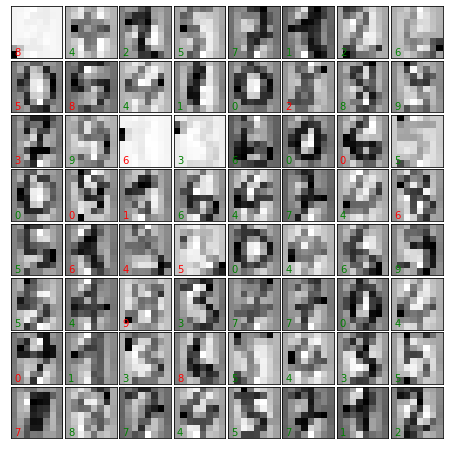

In [107]:
# plotting the prediction
fig=plt.figure(figsize=(6,6)) # figure sixe in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

#plot the digits; each image is 8x8 pixels
for i in range(64):
    ax =fig.add_subplot(8,8,i+1, xticks=[], yticks=[])
    ax.imshow(x_test.reshape(-1,8,8)[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    if predicted[i]==expected[i]:
        ax.text(0,7, str(predicted[i]), color='green')
    else:
        ax.text(0,7, str(predicted[i]), color='red')

In [109]:
correct=0
wrong=0
for i in range(450):
    if predicted[i]==expected[i]:
        correct=correct+1
    else:
        wrong=wrong+1

In [110]:
print(correct)
print(wrong)

379
71


#### Answer: Option D. 70-80

#### 12.With the above model how many images are classified as 8.

A. 38
B. 36
C. 35
D. 32

In [114]:
count = 0
for i in range(450):
    if predicted[i]==8:
        count=count+1

In [115]:
print(count)

35


#### Answer: Option C. 35 

#### 13. Without applying PCA, how much misclassified data are there?

A. 45
B. 63
C. 23
D. 22

In [116]:
X = digits.data
Y = digits.target

In [117]:
[X.shape,Y.shape]

[(1797, 64), (1797,)]

In [149]:
from sklearn import tree
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)
Model =tree.DecisionTreeClassifier()
Model.fit(X_train,Y_train)
predicted = Model.predict(X_test)
expected=Y_test

In [123]:
X_train.shape

(1347, 64)

In [150]:
Correct=0
Wrong=0
for i in range(449):
    if predicted[i]==expected[i]:
        Correct=Correct+1
    else:
        Wrong=Wrong+1
        
print(Correct)
print(Wrong)

386
63


#### Answer: Option B. 63 

#### 14. Which of the following non-zero vector stays parallel after matrix multiplication

A. EigenValue
B. EigenVector
C. Covariance vector
D. Explained variance ratio

#### Answer: Option B. EigenVector 

#### 15. The Output of PCA is always a new representation of data with a lower dimension than the original data representation.

A. True
B. False

#### Answer: Option A. True 